In [1]:
import pandas as pd
import gensim
import numpy as np
import re
import multiprocessing
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

C:\Users\sasaki.f\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [18]:
model = Word2Vec.load("defaults.model")

In [11]:
def analyseModel(model):
    word_vectors = model.wv
    number_of_samples = len(word_vectors.vocab) // 10
    length = str(len(word_vectors.vocab))
    randomNumbers = np.random.randint(low=1, high=length, size=number_of_samples) 
    totalSum = 0
    for n in randomNumbers:
        word = word_vectors.index2word[int(n)]
        values = [value[1] for value in word_vectors.most_similar(word)]
        totalSum += sum(values) / len(values)
    return(totalSum / number_of_samples)

In [12]:
def print_model_parameters(model):
    parameters = ""
    parameters += "\t" + str(model.corpus_total_words)
    parameters += "\t" + str(model.epochs)
    parameters += "\t" + str(model.layer1_size)
    parameters += "\t" + str(model.min_alpha)
    parameters += "\t" + str(model.min_count)
    parameters += "\t" + str(model.sample)
    parameters += "\t" + str(model.negative)
    parameters += "\t" + str(analyseModel(model))
    return parameters

In [17]:
import os
model_analysis = "filename" + "\t" + "vocabulary size" + "\t" + "epochs" + "\t" + "hidden layer size" + "\t" + "learning rate" + "\t" + "min count" + "\t" + "downsampling" + "\t" + "negative sampling" + "\t" + "model quality"  
rootdir = '.'
extensions = ('.model')
for subdir, dirs, files in os.walk(rootdir):
    if ".git" in dirs:
        dirs.remove(".git")
    if ".ipynb_checkpoints" in dirs:
        dirs.remove(".ipynb_checkpoints")
    for file in files:
        ext = os.path.splitext(file)[-1].lower()
        if ext in extensions:
            model_analysis += "\n" + str(file) 
            model = Word2Vec.load(str(file))
            model_analysis += print_model_parameters(model)
f= open("model-analysis.csv","w", encoding="utf-8")
f.write(model_analysis)
f.close()

C:\Users\sasaki.f\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).
  """
C:\Users\sasaki.f\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `min_count` (Attribute will be removed in 4.0.0, use self.vocabulary.min_count instead).
  import sys
C:\Users\sasaki.f\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `sample` (Attribute will be removed in 4.0.0, use self.vocabulary.sample instead).
  


In [18]:
analysis = pd.read_csv('model-analysis.csv',sep='\t', encoding='utf-8')

In [19]:
analysis.sort_values(by=['model quality'],ascending=False)

,filename,vocabulary size,epochs,hidden layer size,learning rate,min count,downsampling,negative sampling,model quality
13,training22.model,571294,5,300,0.0007,5,0.00006,20,0.999932
15,training24.model,363814,5,300,0.0007,5,0.00006,20,0.999930
11,training20.model,363814,5,300,0.0007,5,0.00001,20,0.999906
8,training17.model,571294,5,150,0.0007,5,0.00001,20,0.999887
12,training21.model,571294,5,150,0.0007,5,0.00006,20,0.999867
14,training23.model,363814,5,150,0.0007,5,0.00006,20,0.999863
10,training19.model,363814,5,150,0.0007,5,0.00001,20,0.999839
9,training18.model,571294,5,300,0.0007,5,0.00001,20,0.999193
0,defaults-without-gensim-preprocessing.model,571294,5,100,0.0001,5,0.00100,5,0.990269
1,defaults.model,363814,5,100,0.0001,5,0.00100,5,0.986090


In [32]:
model = Word2Vec.load('defaults-without-gensim-preprocessing.model')

In [33]:
model.wv.most_similar('deutschland')

C:\Users\sasaki.f\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('schweiz', 0.9321011304855347),
 ('italien', 0.8670862913131714),
 ('arbeitsbeziehungen', 0.8310689926147461),
 ('grossbritannien', 0.8289081454277039),
 ('frankreich', 0.8199114799499512),
 ('belgien', 0.8131426572799683),
 ('finnland', 0.8074034452438354),
 ('niederlande', 0.8066576719284058),
 ('neue_bundeslaender', 0.8042818307876587),
 ('irland', 0.7949962615966797)]

In [34]:
vocabulary = model.wv.vocab.keys()
output = ""
type(vocabulary)
f= open("vocabulary-defaults.txt","w", encoding="utf-8")
for x in vocabulary:
    output += str (x) + "\n"
f.write(output)
f.close()

In [43]:
def tsnescatterplot(model, word, list_names):
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    close_words = model.wv.most_similar([word])
    
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    reduc = PCA(n_components=9).fit_transform(arrays)
    
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    for line in range(0, df.shape[0]):
         title = df["words"][line].title()
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + re.sub('_',' ',title),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

C:\Users\sasaki.f\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


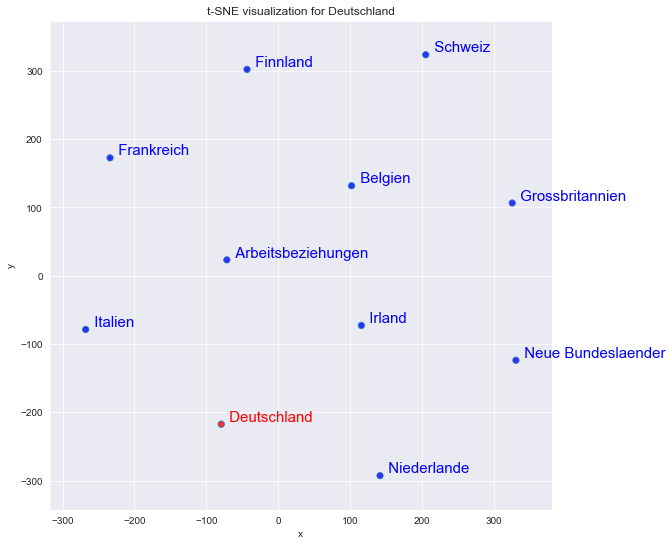

In [44]:
tsnescatterplot(model, 'deutschland', [i[0] for i in model.wv.most_similar(negative=['deutschland'])])